In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
dataset = pd.read_csv("./Data/ClusterData2.csv")

In [52]:
from sklearn import compose
from sklearn import preprocessing

In [53]:
# preprocess the data by encoding the categorical Class of Orbit feature as a one-hot vector 
# and scaling the numerical features to standardize them
preprocess = compose.make_column_transformer(
    ('passthrough', ['NORAD_CAT_ID']),
    (preprocessing.StandardScaler(), ['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 
                                     'MEAN_ANOMALY', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOGEE', 'PERIGEE']),
)

In [54]:
dataset_final = pd.DataFrame(preprocess.fit_transform(dataset))

In [55]:
dataset_final.head()

,0,1,2,3,4,5,6,7,8,9,10
0,68.0,-2.791507,-0.405093,0.721974,-0.361171,-1.496651,1.553059,-0.329224,4.195275,-0.331650,0.379315
1,166.0,0.516571,-0.395721,0.706766,-0.122705,-0.779662,0.860203,-0.341751,-0.270805,-0.336487,-0.888710
2,591.0,0.484039,-0.396748,0.115368,0.483062,-0.509998,0.595647,-0.331122,-0.270065,-0.331319,0.011880
3,666.0,0.500831,-0.403091,0.113430,0.793901,0.463452,-0.360358,-0.336630,-0.270449,-0.335048,-0.281622
4,1058.0,0.486313,-0.379792,0.096968,1.341039,0.250593,0.343559,-0.331871,-0.270117,-0.329094,-0.478224


In [56]:
x = dataset_final.iloc[:, [2,4,8,9]]

In [57]:
x.head()

,2,4,8,9
0,-0.405093,-0.361171,4.195275,-0.331650
1,-0.395721,-0.122705,-0.270805,-0.336487
2,-0.396748,0.483062,-0.270065,-0.331319
3,-0.403091,0.793901,-0.270449,-0.335048
4,-0.379792,1.341039,-0.270117,-0.329094


In [58]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [59]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(x)

In [60]:
PCA_components = pd.DataFrame(reduced_data)

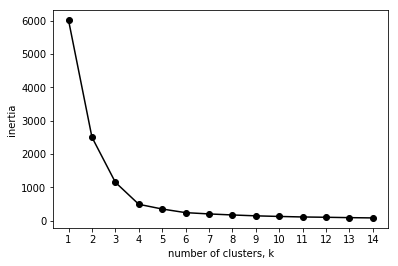

In [61]:
ks = range(1, 15)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

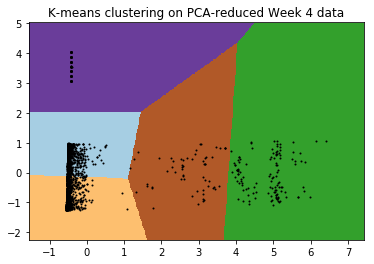

In [63]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=6)
kmeans.fit(reduced_data)
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
# centroids = kmeans.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='x', s=169, linewidths=3,
#             color='w', zorder=10)
plt.title('K-means clustering on PCA-reduced Week 4 data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks()
plt.yticks()
plt.show()

In [64]:
# print(centroids[4])

In [65]:
cluster_map = pd.DataFrame()
cluster_map['NORAD_CAT_ID'] = dataset_final.iloc[:, 0]
cluster_map['cluster'] = kmeans.labels_

In [66]:
a = [9191, 11682, 30206, 79815, 74415, 10814, 12605, 54494, 55340, 58006, 75276, 87343, 88756, 9356, 31859, 36829, 45268, 47507, 70237, 72643, 74562, 74866, 87337, 89581, 95609]
cluster_map[cluster_map.NORAD_CAT_ID.isin(a)]

,NORAD_CAT_ID,cluster
54,9191.0,3
57,9356.0,3
67,10814.0,3
75,11682.0,3
81,12605.0,3
216,30206.0,3
225,31859.0,3
263,36829.0,3
320,45268.0,3
339,47507.0,3


In [67]:
broken = [13519,93626,54145,21572]
cluster_map[cluster_map["NORAD_CAT_ID"].isin(broken)]

,NORAD_CAT_ID,cluster
1023,13519.0,4
1024,93626.0,4
1025,54145.0,4
1026,21572.0,4


In [68]:
constellation = cluster_map[cluster_map.cluster==3]
constellation

,NORAD_CAT_ID,cluster
0,68.0,3
25,5855.0,3
38,6916.0,3
48,8333.0,3
50,8740.0,3
53,9140.0,3
54,9191.0,3
57,9356.0,3
59,9594.0,3
67,10814.0,3


In [69]:
sunconnect = constellation["NORAD_CAT_ID"].to_list()

In [70]:
validation = pd.read_csv("./Data/satellites.csv")
validation.head()

,Unnamed: 0,NORAD_CAT_ID,cluster,RA_OF_ASC_NODE
0,0,68.0,4,145.641
1,25,5855.0,4,145.623
2,38,6916.0,4,42.835
3,48,8333.0,4,145.688
4,50,8740.0,4,17.001


In [71]:
def diffList(list1, list2):     # returns the difference between two lists.
    if len(list1) > len(list2):
        return (list(set(list1) - set(list2)))
    else:
        return (list(set(list2) - set(list1)))
weird_satellites = diffList(validation["NORAD_CAT_ID"].to_list(),sunconnect)
weird_satellites

[54145.0, 93626.0, 21572.0, 13519.0]

In [72]:
dataset[dataset["NORAD_CAT_ID"].isin(weird_satellites)]

,Unnamed: 0,NORAD_CAT_ID,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,SEMIMAJOR_AXIS,PERIOD,APOGEE,PERIGEE,Faulty
1023,5281,13519,11/8/2019 10:38,7.253948,0.382529,99.9636,217.9094,337.4955,9.4682,11272.464,198.512,9206.373,582.284,0
1024,5290,93626,11/8/2019 7:19,6.962931,0.400671,100.0029,234.8501,202.2725,339.6049,11584.406,206.809,9847.810,564.732,0
1025,5295,54145,11/8/2019 10:11,6.972316,0.400103,100.0185,243.1227,186.5765,328.7174,11574.008,206.531,9826.663,565.083,0
1026,5302,21572,11/8/2019 4:45,7.278285,0.382279,99.9425,232.2875,273.9549,44.3237,11247.322,197.848,9168.806,569.567,0


In [79]:
p = dataset[dataset["ECCENTRICITY"]==0]
diff_satellites = diffList(p["NORAD_CAT_ID"].to_list(),sunconnect)
diff_satellites
overall = pd.read_csv("./Data/AllWeeks.csv")

In [158]:
print(len(overall["NORAD_CAT_ID"].unique()))
overall.describe()

17204


,Unnamed: 0,NORAD_CAT_ID,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,SEMIMAJOR_AXIS,PERIOD,APOGEE,PERIGEE
count,268191.000000,268191.000000,268191.000000,268191.000000,268191.000000,268191.000000,268191.000000,268191.000000,268191.000000,268191.000000,268191.000000,268191.000000
mean,62727.103587,50459.697007,12.483072,0.039351,78.724605,173.049543,170.161162,179.097996,10166.692294,400.369713,4591.348523,2985.765827
std,41991.754514,29044.201158,4.809296,0.140546,28.004364,116.564432,110.332871,107.690271,9000.572577,1056.621532,10746.556009,8382.627658
min,0.000000,5.000000,0.057840,0.000000,0.000000,0.000400,0.000000,0.000000,6499.893000,86.919000,136.430000,63.194000
25%,26449.500000,25069.000000,13.403491,0.000739,70.858750,60.798600,73.452850,82.648600,6916.997000,95.419000,560.993783,503.977500
50%,59973.000000,50908.000000,14.542238,0.001831,96.964900,170.704500,168.577000,177.780500,7032.726000,99.021000,690.207000,605.560000
75%,93497.000000,75531.000000,15.091264,0.007198,97.893800,286.082300,268.717300,274.703050,7362.738500,107.434000,1093.448000,834.244500
max,152243.000000,99996.000000,16.566982,0.933672,144.640000,359.998800,359.999100,359.999000,108515.298000,6224.037000,197709.506000,39889.825000


In [80]:
constellation.loc[constellation["NORAD_CAT_ID"].isin(diff_satellites)]

,NORAD_CAT_ID,cluster


## Bayesian Inference

26
26
14
0


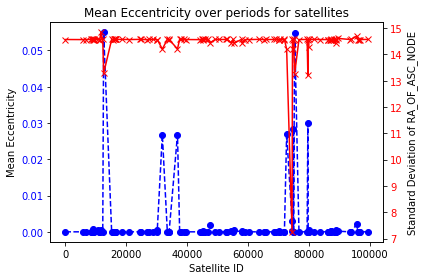

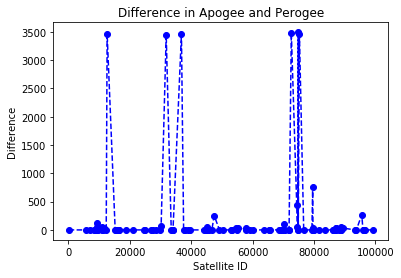

In [155]:
import matplotlib.pyplot as plt
constellation_data=[]
for satellite in sunconnect:
    sat_data = overall.loc[overall["NORAD_CAT_ID"]==satellite]
    constellation_data.append((sat_data,satellite))
means = []
parameters = []
parameters2 = []
irregular = []
irregular2 = []
irregular3 = []
count = 0
count2 = 0
count3 = 0
for frame,ids in constellation_data:
    mean = np.mean(frame["ECCENTRICITY"])
    parameter = np.max(frame["APOGEE"]-frame["PERIGEE"])
    parameter2 = np.std(frame["RA_OF_ASC_NODE"])
    parameters.append(parameter)
    means.append(mean)
    parameters2.append(parameter2)
    if mean > 0:
        count+=1
        irregular.append(ids)
    if parameter > 10:
        count2+=1
        irregular2.append(ids)
    if parameter2 < 14.5:
        count3+=1
        irregular3.append(ids)
print(count)
print(count2)
print(count3)
count4 = 0
for irr in irregular3:
    if irr not in irregular2:
        print(irr)
        count4+=1
print(count4)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Satellite ID")
ax1.set_ylabel("Mean Eccentricity")
ax1.plot(sunconnect, means,linestyle='--',marker='o', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title("Mean Eccentricity over periods for satellites")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Standard Deviation of RA_OF_ASC_NODE')  # we already handled the x-label with ax1
ax2.plot(sunconnect,parameters2,marker='x',color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# print(diffList(parameters2,sunconnect))
# plt.show()
# plt.figure()
# plt.plot(sunconnect,means,linestyle='--', marker='o', color='b')
# plt.plot(sunconnect,parameters2,marker='x',color='r')
# plt.title('Mean Eccentricity over periods for satellites')
# plt.xlabel("Satellite ID")
# plt.ylabel("Mean Eccentricity")
# plt.show()
plt.figure()
plt.plot(sunconnect,parameters,linestyle='--', marker='o', color='b')
plt.title('Difference in Apogee and Perogee')
plt.xlabel("Satellite ID")
plt.ylabel("Difference")
plt.show()

In [42]:
import pymc3 as pm
import numpy as np

alphas = np.ones(101)

c= np.array()

with pm.Model() as model:
    parameters = pm.Dirichlet('parameters',a=alphas, shape=3)

SyntaxError: invalid syntax (<ipython-input-42-f7f9f48cb8bc>, line 2)